Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.7440 - loss: 0.6958 - val_accuracy: 0.8697 - val_loss: 0.3612
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8756 - loss: 0.3411 - val_accuracy: 0.8810 - val_loss: 0.3225
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8956 - loss: 0.2833 - val_accuracy: 0.8770 - val_loss: 0.3261
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9071 - loss: 0.2535 - val_accuracy: 0.8976 - val_loss: 0.2815
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9179 - loss: 0.2246 - val_accuracy: 0.9029 - val_loss: 0.2694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9249 - loss: 0.2013 - val_accuracy: 0.9036 - val_loss: 0.2626
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9324 - loss: 0.1830 - val_accuracy: 0.9062 - val_loss: 0.2704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9385 -

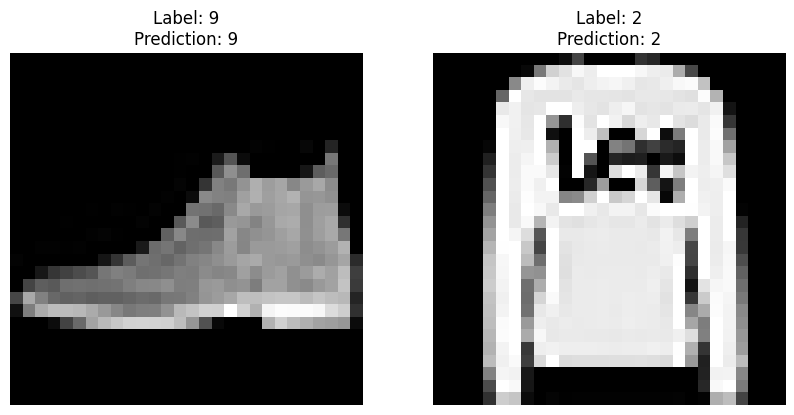

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Data preprocessing
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# CNN model defining
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Make predictions
predictions = model.predict(test_images)

# Function to plot images and their predictions
def plot_images(images, labels, predictions, index):
    plt.figure(figsize=(10, 5))
    for i in range(2):
        plt.subplot(1, 2, i + 1)
        plt.imshow(images[index + i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[index + i]}\nPrediction: {np.argmax(predictions[index + i])}')
        plt.axis('off')
    plt.show()

# Predictions for the first two test images
plot_images(test_images, test_labels, predictions, 0)
